In [1]:
#Importing investpy library for investing.com
import investpy
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Crypto1=input('Enter First Crypto: ')
Crypto2=input('Enter Second Crypto: ')
Crypto3=input('Enter Third Crypto: ')
Crypto4=input('Enter Fourth Crypto: ')
Crypto5=input('Enter Fifth Crypto: ')

def cryptocurrency(crypto):
    crypto_data=investpy.get_crypto_historical_data(crypto=crypto,from_date='25/06/2015',to_date='25/06/2021')
    return(crypto_data)



#Calling the functions on the basis of the inputs
df1=cryptocurrency(Crypto1)
df2=cryptocurrency(Crypto2)
df3=cryptocurrency(Crypto3)
df4=cryptocurrency(Crypto4)
df5=cryptocurrency(Crypto5)


Enter First Crypto:  Bitcoin
Enter Second Crypto:  Ethereum
Enter Third Crypto:  Cardano
Enter Fourth Crypto:  Dogecoin
Enter Fifth Crypto:  Tether


In [3]:
#Defining the list and storing dataframes in the list
list_crypto=[df1,df2,df3,df4,df5]
crypto_dataframe=pd.DataFrame()
#Concatnating the dateframe
for i in list_crypto:
    crypto_dataframe=pd.concat([crypto_dataframe,i],axis=1)

#Getting the closing prices
crypto_dataframe=crypto_dataframe['Close']


#Renaming the columns
crypto_dataframe.columns=[Crypto1,Crypto2,Crypto3,Crypto4,Crypto5]

crypto_dataframe.head() 


,Bitcoin,Ethereum,Cardano,Dogecoin,Tether
Date,,,,,
2015-06-25,242.6,NaN,NaN,NaN,NaN
2015-06-26,242.9,NaN,NaN,NaN,NaN
2015-06-27,250.7,NaN,NaN,NaN,NaN
2015-06-28,248.9,NaN,NaN,NaN,NaN
2015-06-29,257.0,NaN,NaN,NaN,NaN


In [4]:
#Checking For Null Values
crypto_dataframe.isnull().sum()

Bitcoin       0
Ethereum    259
Cardano     920
Dogecoin    709
Tether      660
dtype: int64

In [5]:
# Dropping the NA's
crypto_dataframe=crypto_dataframe.dropna()
#Chcecking for NA's again
crypto_dataframe.isnull().sum()

Bitcoin     0
Ethereum    0
Cardano     0
Dogecoin    0
Tether      0
dtype: int64

In [6]:
#Calculating Daily Returns
crypto_daily_returns=crypto_dataframe.pct_change()
#Dropping Null from daily returns
crypto_daily_returns=crypto_daily_returns.dropna()
crypto_daily_returns

,Bitcoin,Ethereum,Cardano,Dogecoin,Tether
Date,,,,,
2018-01-01,-0.029277,0.021296,-0.010986,-0.027893,-0.009804
2018-01-02,0.097375,0.141297,0.085161,0.037105,0.009901
2018-01-03,0.027281,0.096917,0.417323,0.022778,-0.009804
2018-01-04,0.001550,-0.002134,0.022500,0.044324,0.009901
2018-01-05,0.116910,0.024223,-0.099065,0.305524,-0.019608
...,...,...,...,...,...
2021-06-21,-0.109670,-0.157176,-0.175999,-0.357162,0.000699
2021-06-22,0.025382,-0.007678,-0.020214,0.061197,-0.000499
2021-06-23,0.036247,0.048879,0.085584,0.234234,-0.000699


In [7]:
df1.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2015-06-25,240.6,243.6,239.3,242.6,40360,USD
2015-06-26,242.6,243.5,240.1,242.9,37618,USD
2015-06-27,242.9,251.6,241.8,250.7,54700,USD
2015-06-28,250.7,251.6,246.6,248.9,39892,USD
2015-06-29,248.9,257.5,248.0,257.0,92643,USD


In [8]:
#Defining a function for the Fibonacci Retracement
def plot_fib_ret(data,crypto_name):
    max_price = data['Close'].max()
    min_price = data['Close'].min()
    diff = max_price - min_price     
    Level1 = max_price - diff * 0.236   
    Level2 = max_price - diff * 0.382  
    Level3= max_price - diff * 0.5     
    Level4 = max_price - diff * 0.618  

    print("Level------------", "Price")
    print("00.0%\t\t", max_price)
    print("23.6%\t\t", Level1)
    print("38.2%\t\t", Level2)
    print("50.0%\t\t", Level3)
    print("61.8%\t\t", Level4)
    print("100.0%\t\t", min_price)
    

    fibonacci = plt.figure(figsize=(20,5))
    plt.style.use('fivethirtyeight')
    plt.title('Fibonnacci Retracement')
    plt.plot(data.index, data['Close'])
    plt.axhline(max_price, alpha=1, color = 'red')
    plt.axhline(Level1,color = 'orange')
    plt.axhline(Level2,color = 'yellow')
    plt.axhline(Level3,color = 'green')
    plt.axhline(Level4,color = 'blue')
    plt.axhline(min_price,color = 'black')
    plt.xlabel('Date',fontsize=15)
    plt.ylabel(f'Closing Price {crypto_name}',fontsize=15)
    plt.show()


Level------------ Price
00.0%		 63540.9
23.6%		 48595.138000000006
38.2%		 39349.031
50.0%		 31876.15
61.8%		 24403.269
100.0%		 211.4


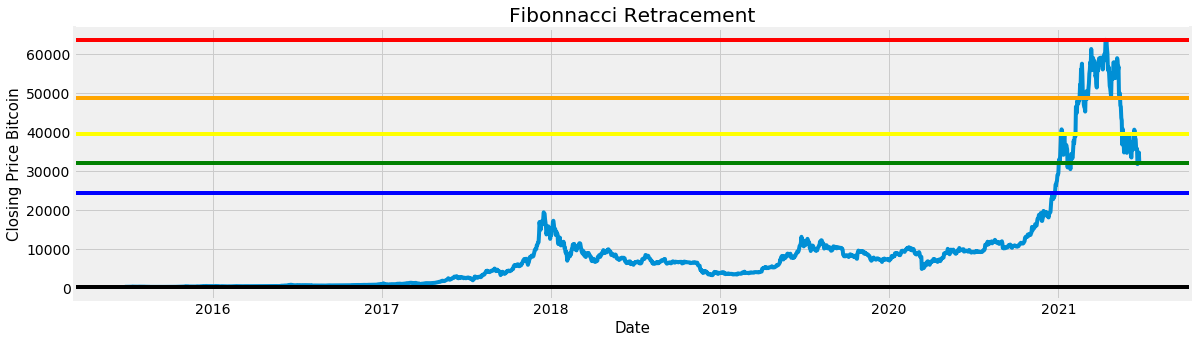

Level------------ Price
00.0%		 4167.78
23.6%		 3185.76512
38.2%		 2578.2474399999996
50.0%		 2087.24
61.8%		 1596.23256
100.0%		 6.7


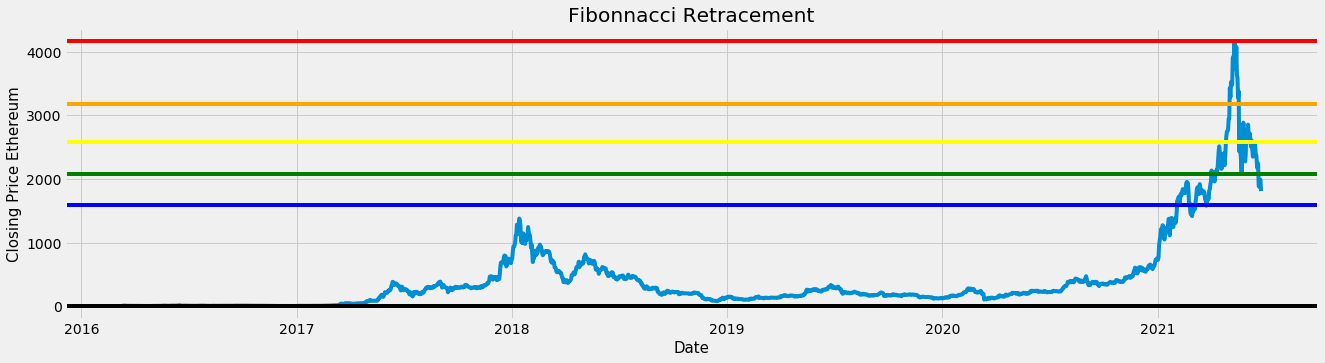

Level------------ Price
00.0%		 2.300278
23.6%		 1.762892784
38.2%		 1.430442608
50.0%		 1.16175
61.8%		 0.893057392
100.0%		 0.023222


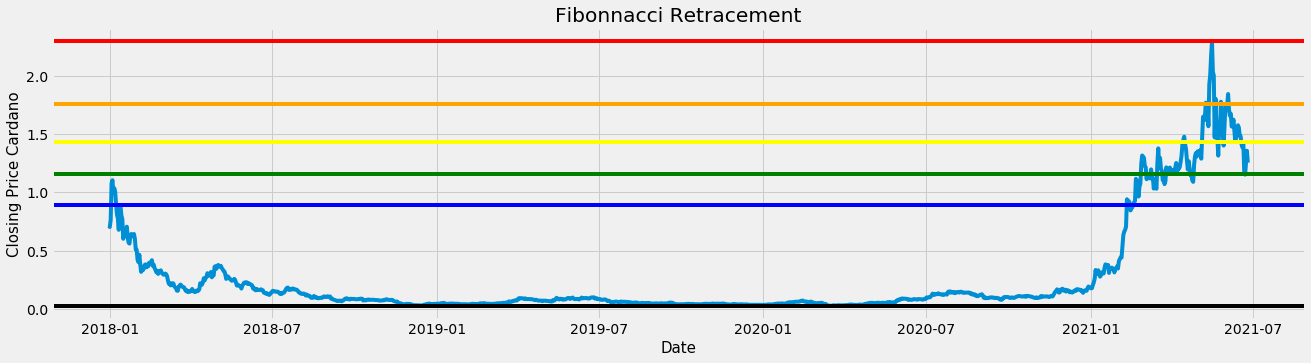

Level------------ Price
00.0%		 0.68688
23.6%		 0.5249589840000001
38.2%		 0.42478750800000004
50.0%		 0.34382700000000005
61.8%		 0.26286649200000006
100.0%		 0.000774


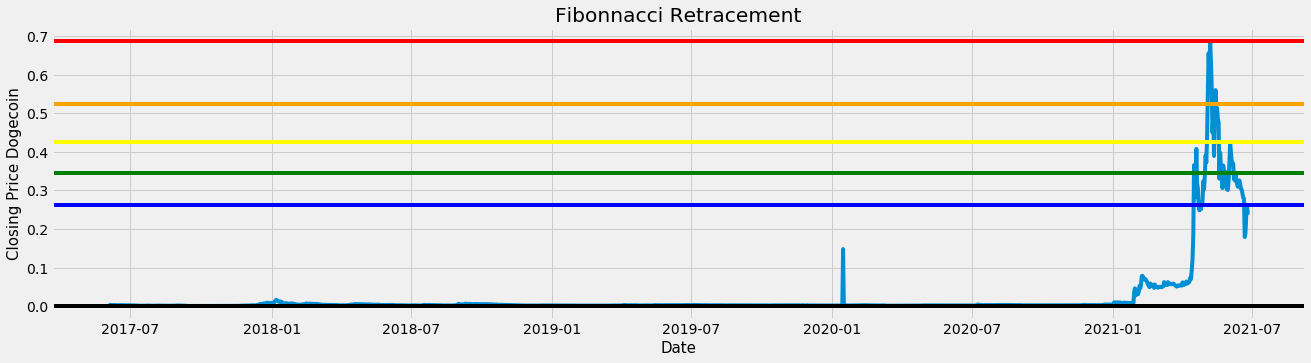

Level------------ Price
00.0%		 1.06
23.6%		 1.023184
38.2%		 1.000408
50.0%		 0.982
61.8%		 0.963592
100.0%		 0.904


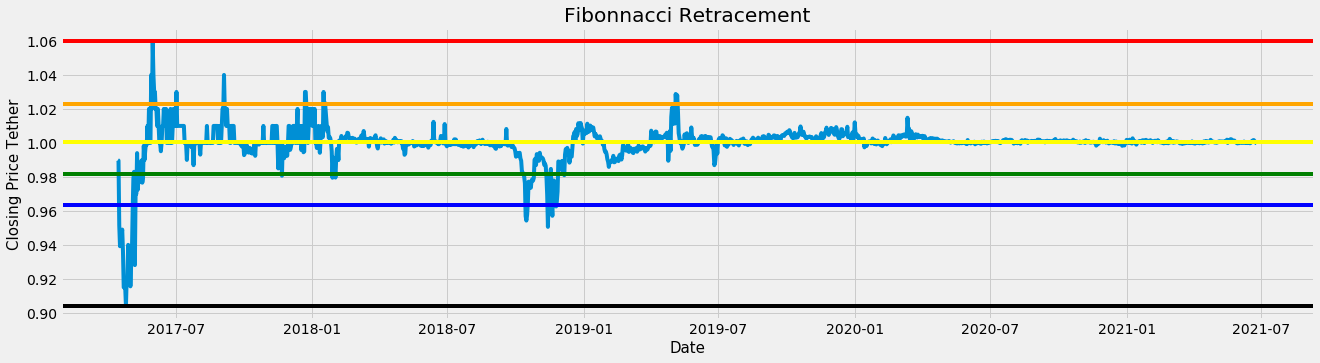

In [9]:
plot_fib_ret(df1,Crypto1)
plot_fib_ret(df2,Crypto2)
plot_fib_ret(df3,Crypto3)
plot_fib_ret(df4,Crypto4)
plot_fib_ret(df5,Crypto5)


In [10]:
#Calculate and plot (ADRIAN)
import investpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''
1)Exponential Moving Average
2)Standard Deviation
3)Variance
4)Covariance
5)Cumulative Returns By assigning weights
6)Correlation
7)Sharp Ratios
8)Rolling Averages'''

'\n1)Exponential Moving Average\n2)Standard Deviation\n3)Variance\n4)Covariance\n5)Cumulative Returns By assigning weights\n6)Correlation\n7)Sharp Ratios\n8)Rolling Averages'

In [11]:
# Exponential Moving Average for closing prices (30 days)
Exponential_moving_Average_1 =crypto_dataframe.ewm(span=30, adjust=False).mean()
Exponential_moving_Average_1

,Bitcoin,Ethereum,Cardano,Dogecoin,Tether
Date,,,,,
2017-12-31,13850.400000,736.770000,0.710000,0.008927,1.020000
2018-01-01,13824.238710,737.782258,0.709497,0.008911,1.019355
2018-01-02,13884.229761,745.588564,0.712884,0.008917,1.019396
2018-01-03,13966.318163,758.260915,0.736569,0.008935,1.018790
2018-01-04,14044.626669,769.986017,0.760294,0.008979,1.018868
...,...,...,...,...,...
2021-06-21,38292.640717,2504.281167,1.527039,0.324135,1.000536
2021-06-22,37918.689703,2463.789479,1.502842,0.315504,1.000579
2021-06-23,37644.858109,2431.828222,1.486566,0.310306,1.000574


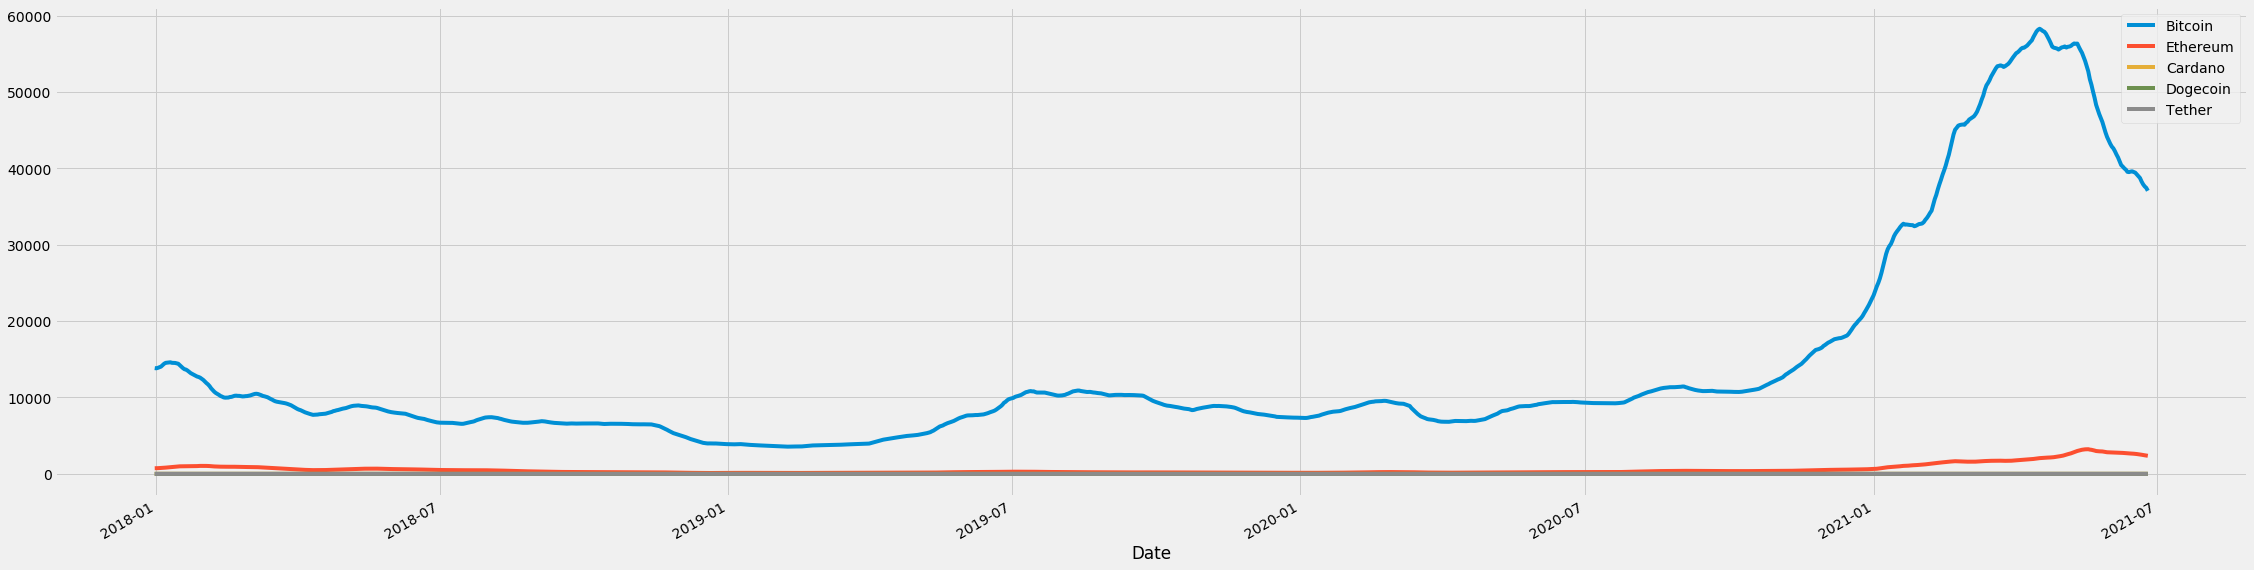

In [12]:
Exponential_moving_Average_1.plot(figsize=(35,10))

In [13]:
# Exponential Moving Average for daily returns
Exponential_moving_Average_2 = crypto_daily_returns.ewm(span=30, adjust=False).mean()
Exponential_moving_Average_2

,Bitcoin,Ethereum,Cardano,Dogecoin,Tether
Date,,,,,
2018-01-01,-0.029277,0.021296,-0.010986,-0.027893,-0.009804
2018-01-02,-0.021106,0.029038,-0.004783,-0.023699,-0.008533
2018-01-03,-0.017984,0.033417,0.022450,-0.020701,-0.008615
2018-01-04,-0.016724,0.031123,0.022453,-0.016506,-0.007420
2018-01-05,-0.008102,0.030678,0.014613,0.004270,-0.008206
...,...,...,...,...,...
2021-06-21,-0.010838,-0.015766,-0.014342,-0.030032,0.000080
2021-06-22,-0.008501,-0.015244,-0.014721,-0.024146,0.000043
2021-06-23,-0.005614,-0.011107,-0.008250,-0.007476,-0.000005


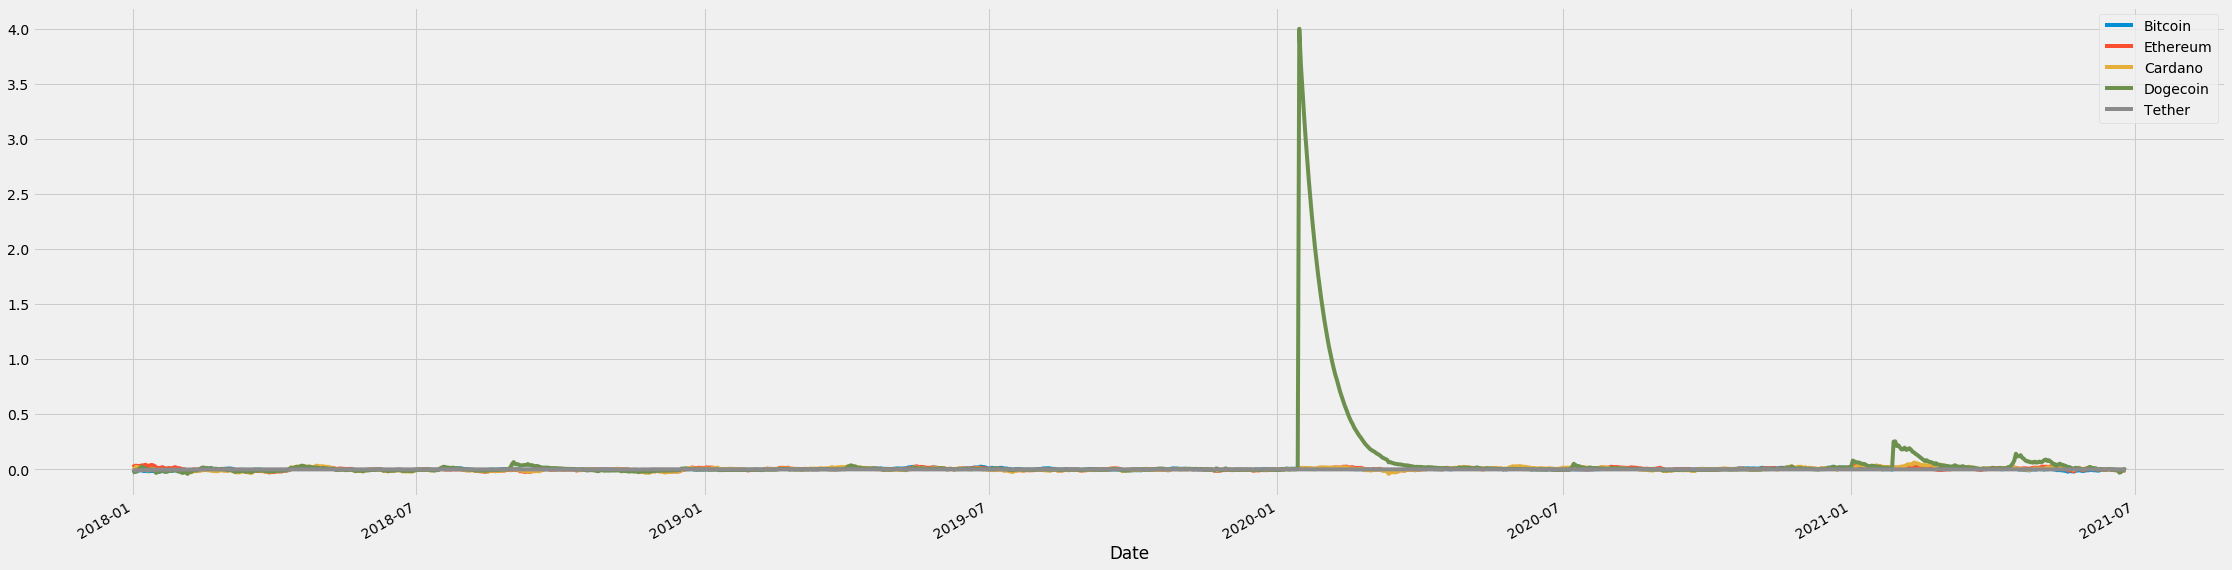

In [14]:
Exponential_moving_Average_2.plot(figsize=(35,10))

In [15]:
# Daily Standard Deviations
daily_std = crypto_daily_returns.std().sort_values(ascending=False)
daily_std

Dogecoin    1.741970
Cardano     0.064952
Ethereum    0.053685
Bitcoin     0.041089
Tether      0.003144
dtype: float64

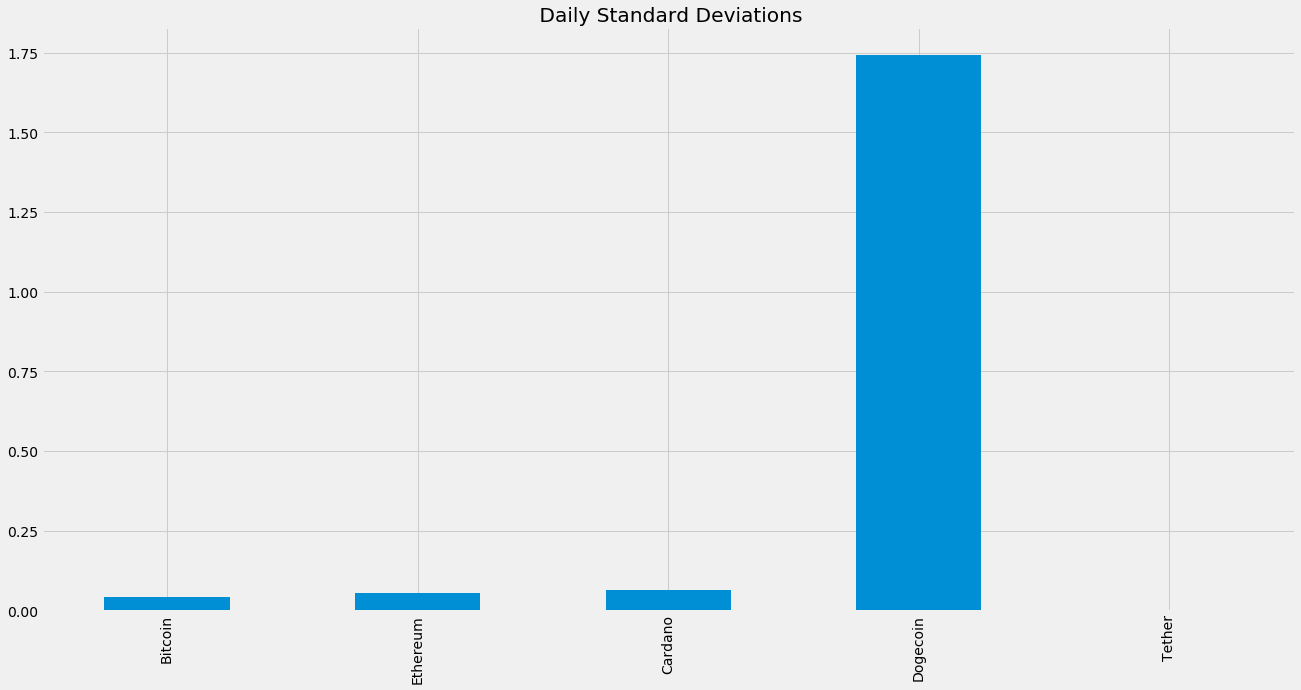

In [16]:
# Plot Standard Deviations
daily_std = crypto_daily_returns.std()
daily_std.plot(kind='bar',title=" Daily Standard Deviations",figsize=(20,10))

In [17]:
# Calculate the annualized standard deviation
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

Dogecoin    27.652915
Cardano      1.031086
Ethereum     0.852216
Bitcoin      0.652268
Tether       0.049908
dtype: float64

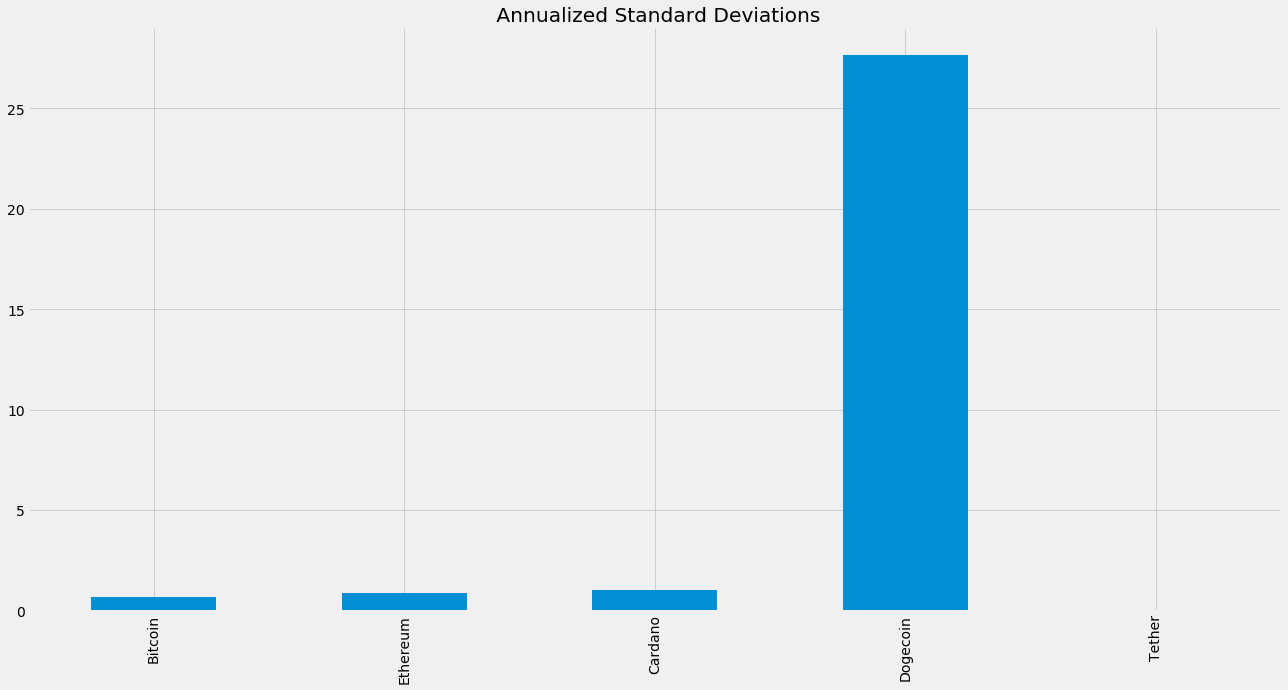

In [18]:
# Plot annualized standard deviation 
annualized_std = daily_std *np.sqrt(252)
annualized_std.plot(kind='bar',title=" Annualized Standard Deviations",figsize=(20,10))

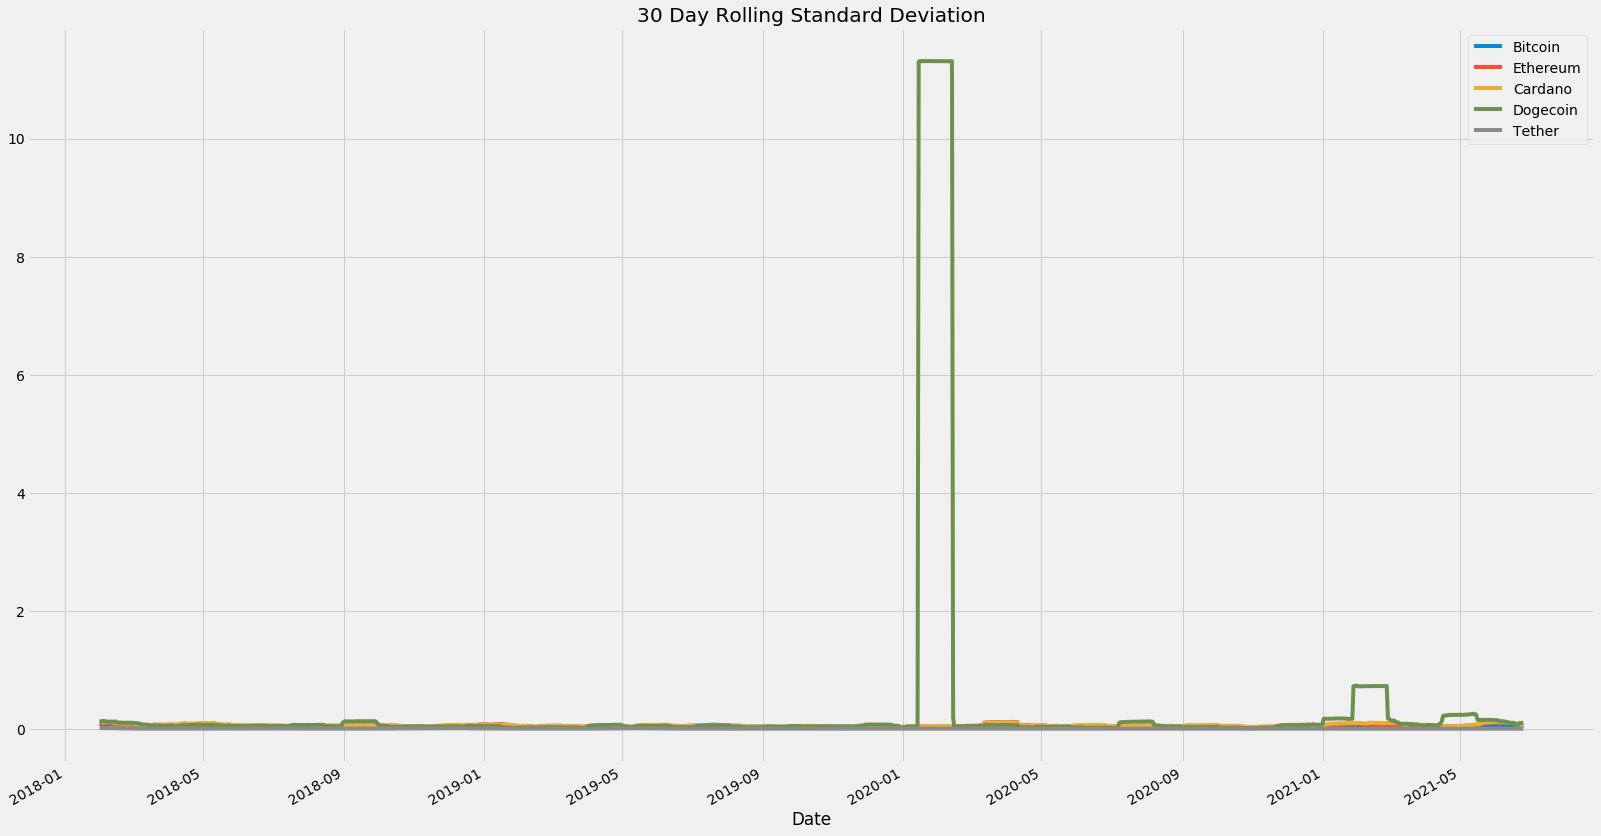

In [20]:
# Plot the rolling standard deviation for all returns using 30 day window
crypto_daily_returns.rolling(window=30).std().plot(title="30 Day Rolling Standard Deviation" , figsize=(25,15))

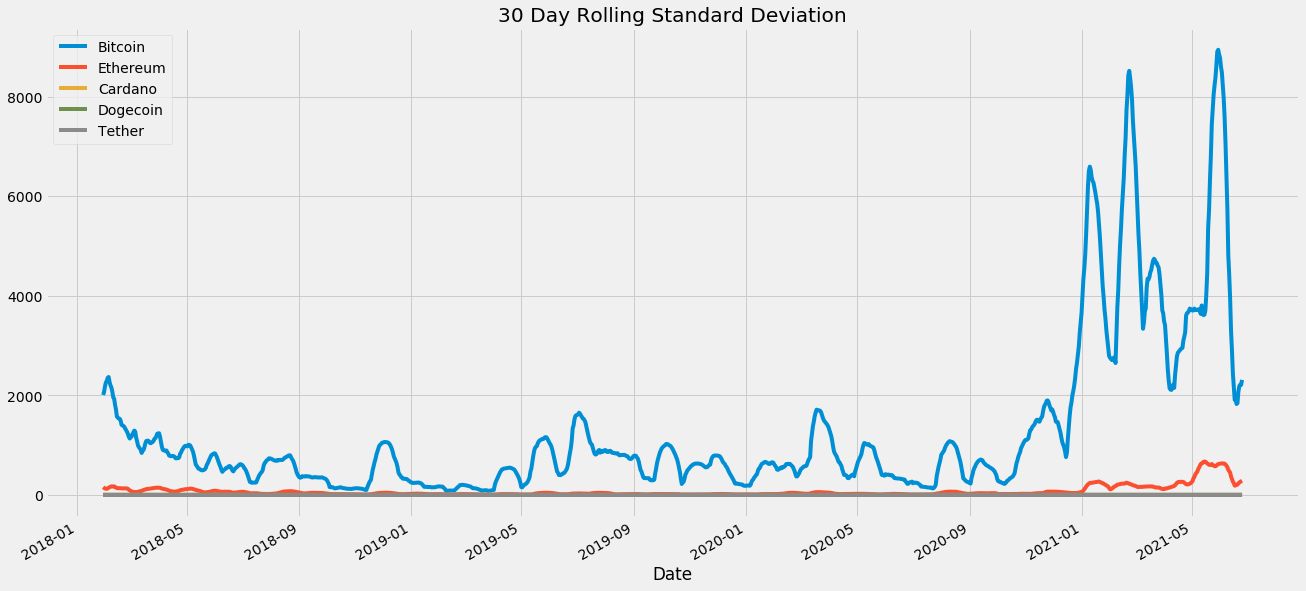

In [23]:
# Plot the rolling standard deviation for all closing prices using 30 day trading day window
crypto_dataframe.rolling(window=30).std().plot(title="30 Day Rolling Standard Deviation" , figsize=(20,10))

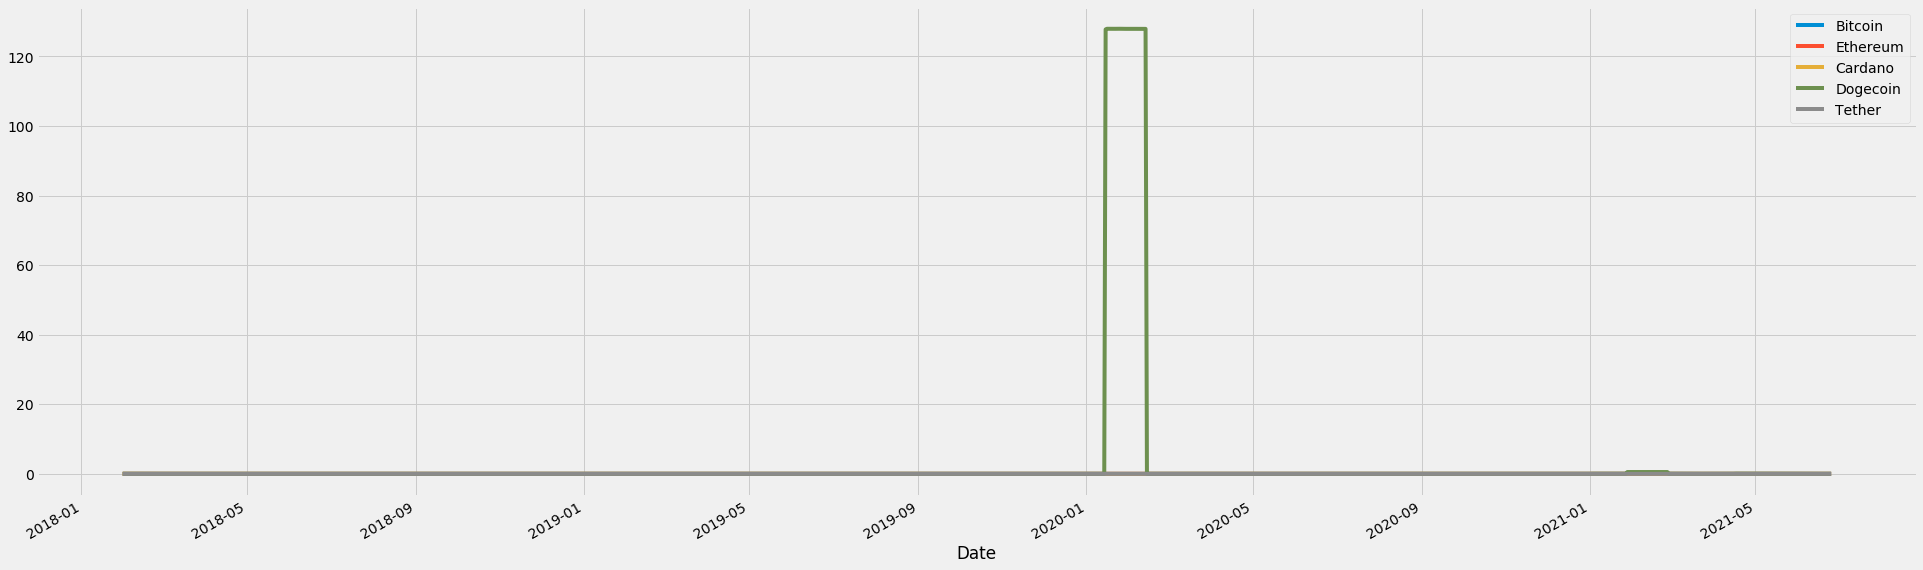

In [25]:
# Plot variance of daily returns
crypto_var.plot(figsize=(30,10))

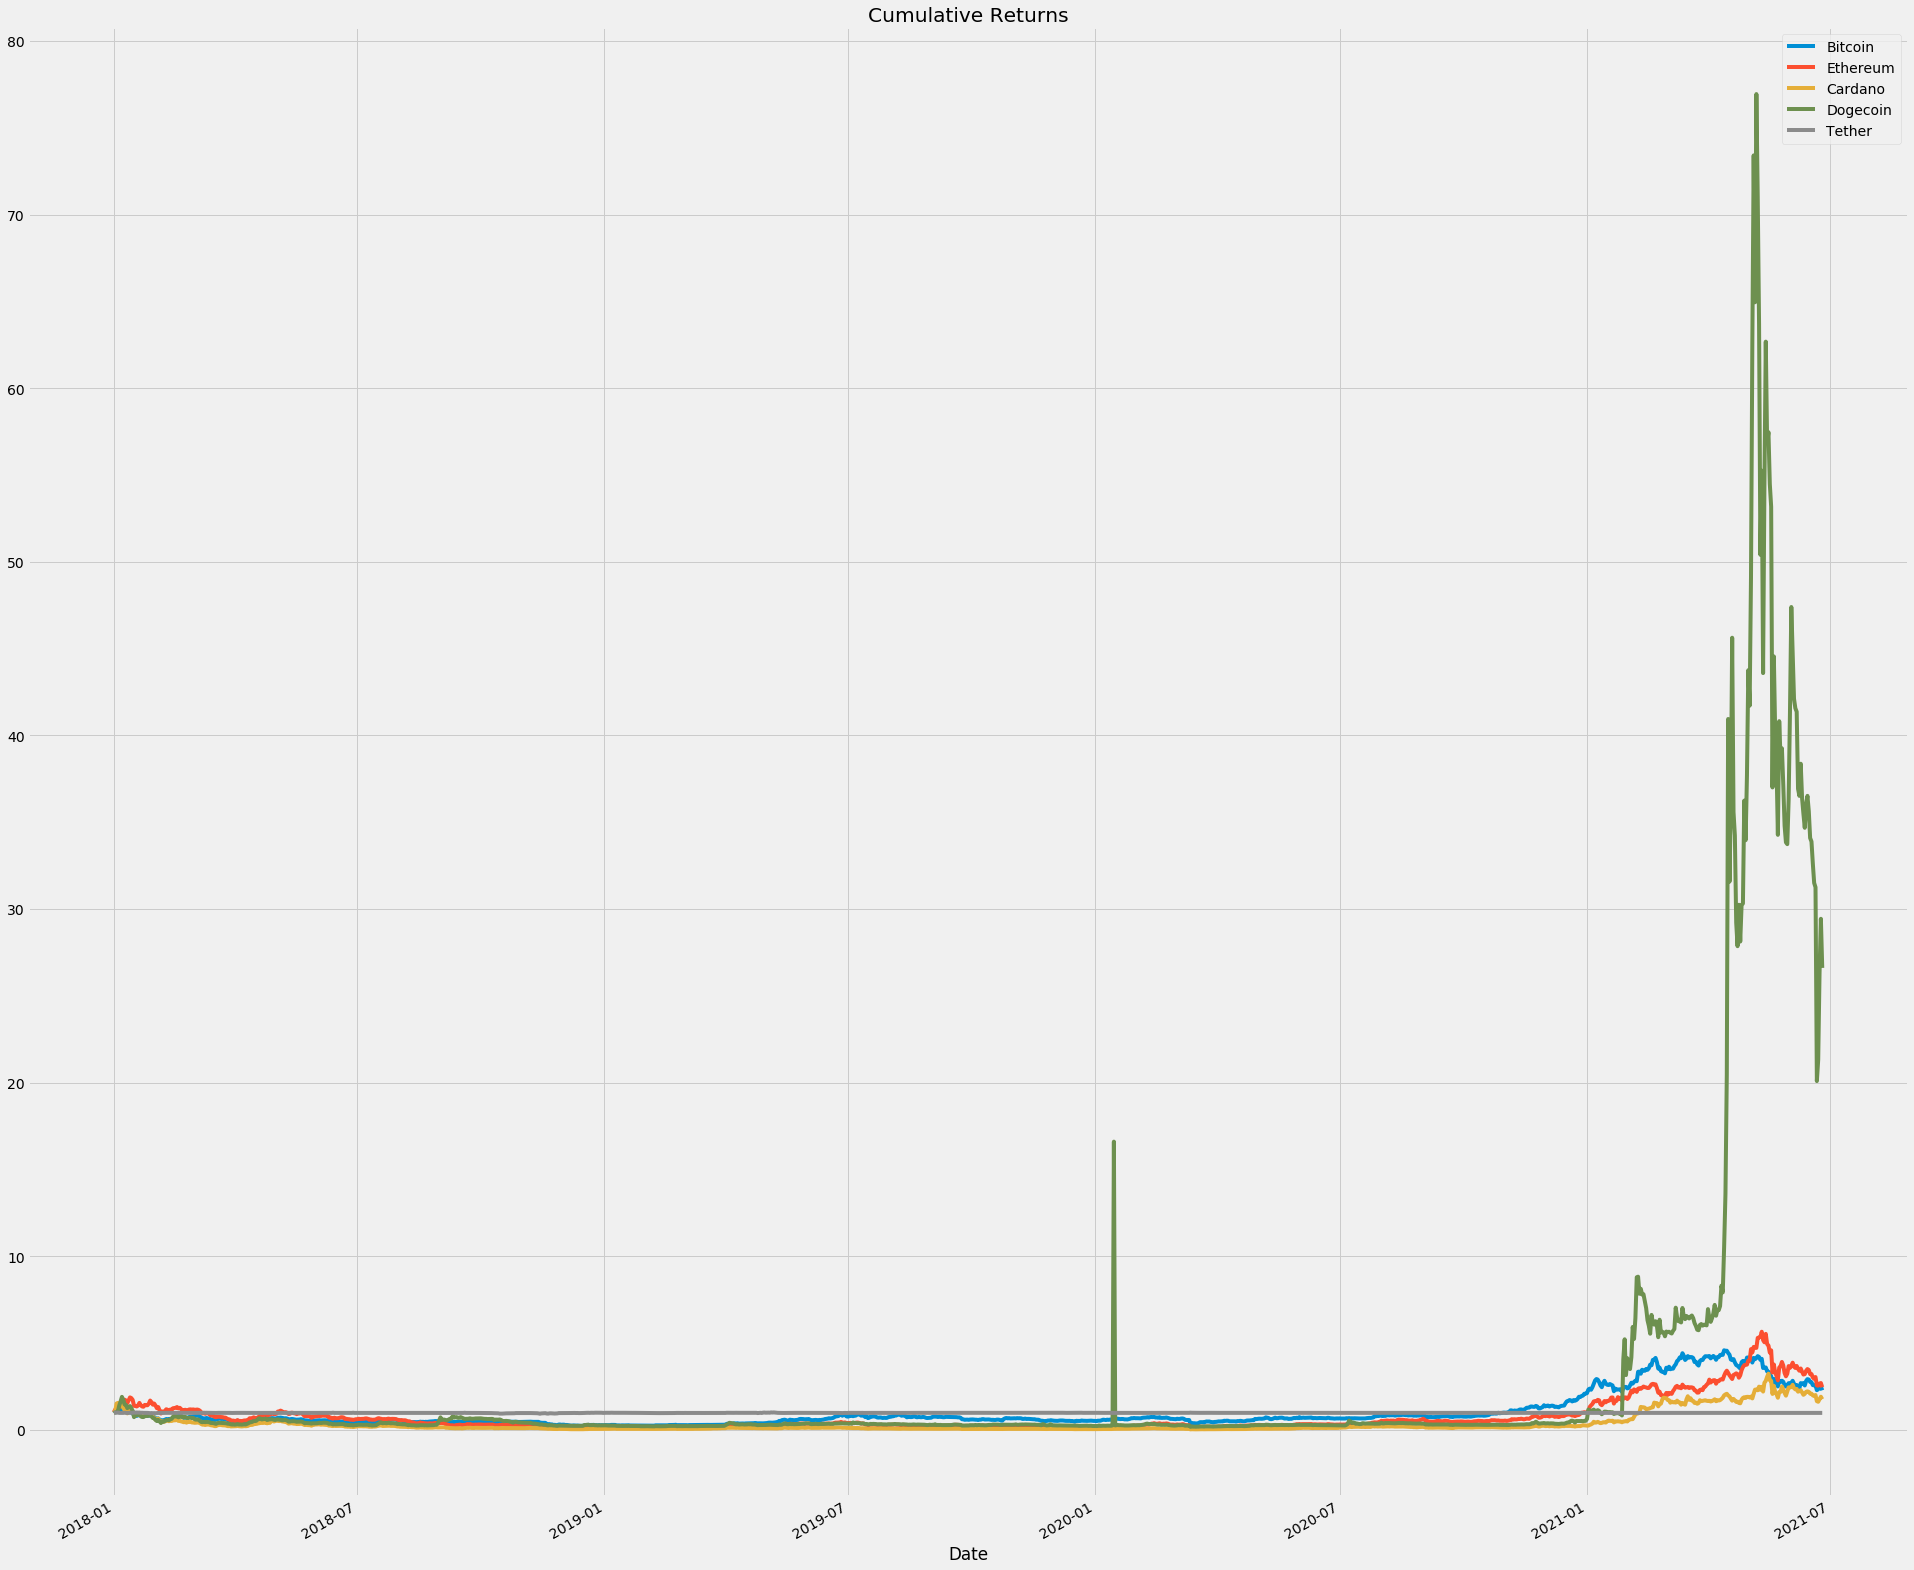

In [26]:
# Calculate cumulative returns of aall cryptocurrencies
cumulative_returns = (1 + crypto_daily_returns).cumprod()
cumulative_returns.plot(figsize=(30, 30), title="Cumulative Returns")

In [33]:
cumulative_returns.head()

,Bitcoin,Ethereum,Cardano,Dogecoin,Tether
Date,,,,,
2018-01-01,0.970723,1.021296,0.989014,0.972107,0.990196
2018-01-02,1.065247,1.165601,1.073239,1.008177,1.000000
2018-01-03,1.094308,1.278567,1.521127,1.031141,0.990196
2018-01-04,1.096004,1.275839,1.555352,1.076846,1.000000
2018-01-05,1.224138,1.306744,1.401272,1.405847,0.980392


In [28]:
# Correlation of Daily Return for different Cryptocurrencies
corr_df = crypto_daily_returns.corr()
corr_df.style.background_gradient(cmap="bwr")

,Bitcoin,Ethereum,Cardano,Dogecoin,Tether
Bitcoin,1.000000,0.806224,0.684238,0.021992,-0.011910
Ethereum,0.806224,1.000000,0.764337,0.021230,0.010873
Cardano,0.684238,0.764337,1.000000,0.031590,0.026864
Dogecoin,0.021992,0.021230,0.031590,1.000000,0.014152
Tether,-0.011910,0.010873,0.026864,0.014152,1.000000


In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (crypto_daily_returns.mean() * 252) / (crypto_daily_returns.std() * np.sqrt(252))
sharpe_ratios

Bitcoin     0.584571
Ethereum    0.646017
Cardano     0.619774
Dogecoin    0.502997
Tether     -0.054550
dtype: float64

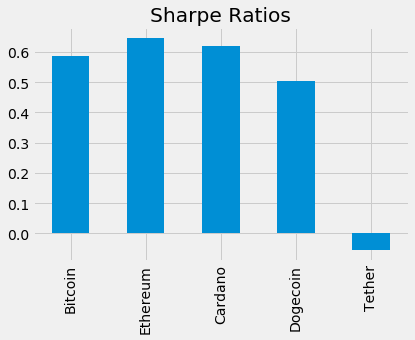

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [31]:
#Data Visualizations(AHMED)
'''
PLEASE CREATE ATLEAST 6-8 VISUALIZATIONS AND A DASHBOARD CONTAINING THESE VISUALIZATIONS
1)Use Pyviz
2)Plotly express
3)Panel 
4)Hvplot
5)Dashboard''' 


'\nPLEASE CREATE ATLEAST 6-8 VISUALIZATIONS AND A DASHBOARD CONTAINING THESE VISUALIZATIONS\n1)Use Pyviz\n2)Plotly express\n3)Panel \n4)Hvplot\n5)Dashboard'

In [32]:
#MC SIMULATIONS (GIORGIO)
# 1)Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
# Plot simulation outcomes
# Plot probability distribution and confidence intervals
# Fetch summary statistics from the Monte Carlo simulation results and print the summary stats
# Set initial investment and Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the investment

# 2)Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# Plot simulation outcomes
# Plot probability distribution and confidence intervals
# Fetch summary statistics from the Monte Carlo simulation results and print the summary stats
# Set initial investment and Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the investment